<font color = green >

## Home Task

</font>

Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use albow methiod to determine the best k for Kmeans


<font color = green >

###  Data 

</font>



In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook

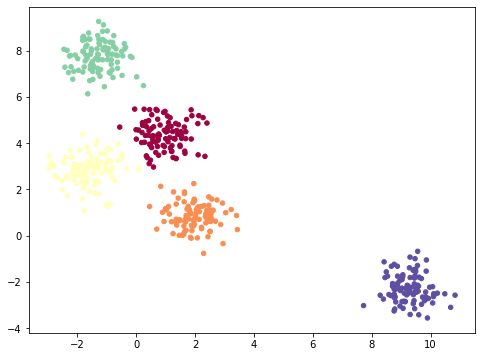

In [2]:
X, y = make_blobs(
    n_samples=500, n_features=2, centers=5, cluster_std=0.6, random_state=0
)
colors = np.array([plt.cm.Spectral(val) for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=20);

### 1. Agglomerative clustering using `complete` linkage 

In [3]:
from sklearn.cluster import AgglomerativeClustering

In [4]:
def show_results_plot(points: np.ndarray, predicted: np.ndarray, n_cluster: int, linkage: str):
    """Draw predicted clusters

    Args:
        points (np.ndarray): array of points
        predicted (np.ndarray): predicted clusters
        n_cluster (int): cluster num
    """
    plt.figure(figsize=(6, 6))
    plt.scatter(points[:, 0], points[:, 1], c=colors[predicted], marker=".")
    plt.title(f"Linkage = {linkage}, Clusters - {n_cluster}")

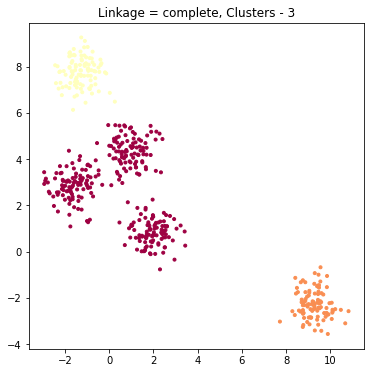

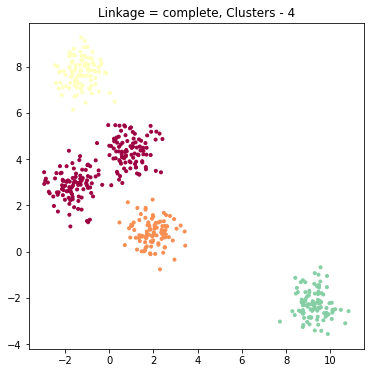

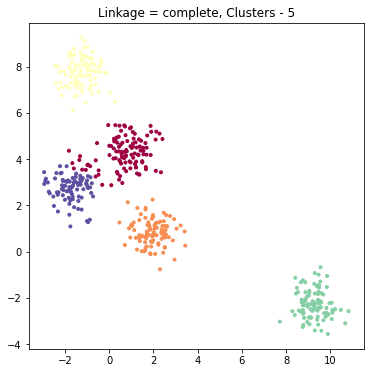

In [5]:
linkage = "complete"
for n_cluster in range(3,6):
    aggl_comp = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
    predicted = aggl_comp.fit_predict(X)
    show_results_plot(X, predicted, n_cluster, linkage)

### 2. Agglomerative clustering using `single` linkage

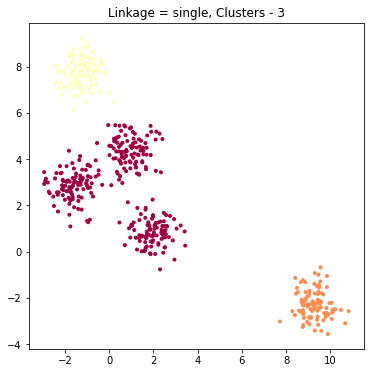

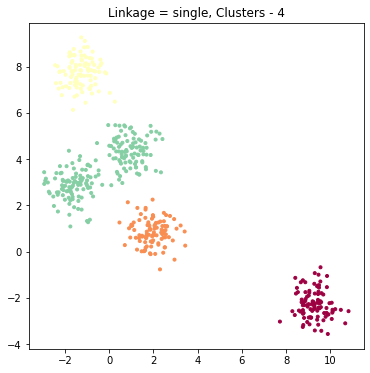

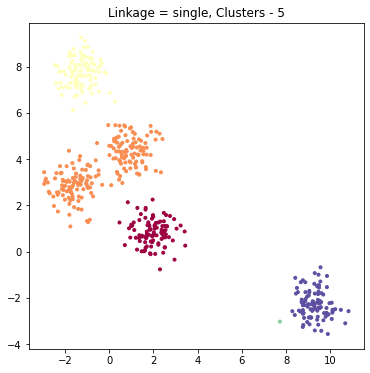

In [6]:
linkage = "single"
for n_cluster in range(3,6):
    aggl_single = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
    predicted = aggl_single.fit_predict(X)
    show_results_plot(X, predicted, n_cluster, linkage)

### 3. DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
# dbscan = DBSCAN(eps=eps, min_samples=5).fit(points)
dbscan = DBSCAN().fit(X) # for this data we can use default values of [eps] and [min_samples]
predicted = dbscan.labels_
print (predicted)

[ 0  1  1  2  1  3  1  3  0  0  4  2  1  4  2  3  2  3  1 -1  0  3 -1  2
  0  4  0  0  4  2  0  1  1  4  1  0  0  3  3  3  4  3  2 -1  1  1  3  1
  0  4  1  3  0 -1  3  1  3  3  4  2 -1  3  0  2  1  4  2  4  1  1  1  0
  2  3  1  2  0  0  2  0  2  4  1  1  3  0  3  1  1  2  2  4  4  2  3  0
  0  2  4  1 -1  4  4  0 -1  2  3  0  0  1  1  2  0  3  3  4  4  4  0  3
  3 -1  1  4  2  1  3  2  4  4 -1  0  1  3  4  3  3  3  1  2  0  4  0  2
  0  3 -1  4 -1  1  1  4  4  0  2  1  1  1  4  2  4  3  2  1  0  0  2  0
  3  0  2  1  3  3  0  4  2  4  1  4  1  4  4 -1  2  3  0  1  4  3  4  0
  3  2  0  2  2  3  4  4  0  4  1  4  4  0  3  2  2  1  3  4  1  4  3  4
  3  0  0  1  0  2  3  3  3  1  2  3  3  2  0  2  1  4  4  2  4  2  3  1
  0  1  4  3  0  0  4  4  0  3  3  1  0  0  1  1 -1  1  2  4  3  2  4  0
  1  2  3  0  2  1  1  4  2  0  4  0  4  0  4  4  2  0  0  0  1  0  4  2
  4  3  2  1  1  1  0  3  4  2  3  4  3  1  0  0  4  1  3  0  0  4  3  4
  1  3  1  2  1  3  3  3  4  4  1  0  1  4  3  3  0

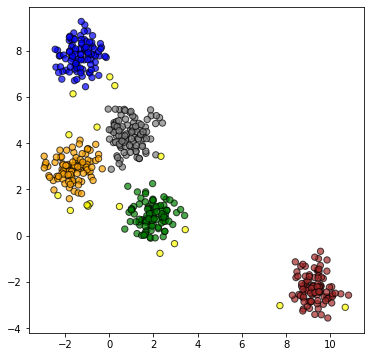

In [9]:
plt.figure(figsize=(6, 6))
colors = np.array(["green", "grey", "orange", "brown", "blue", "yellow"])

plt.scatter(
    X[:, 0],
    X[:, 1],
    c=colors[predicted],
    s=40,
    edgecolor="black",
    label="negative",
    alpha=0.7,
);

### 4. Use elbow methiod to determine the best k for Kmeans

In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

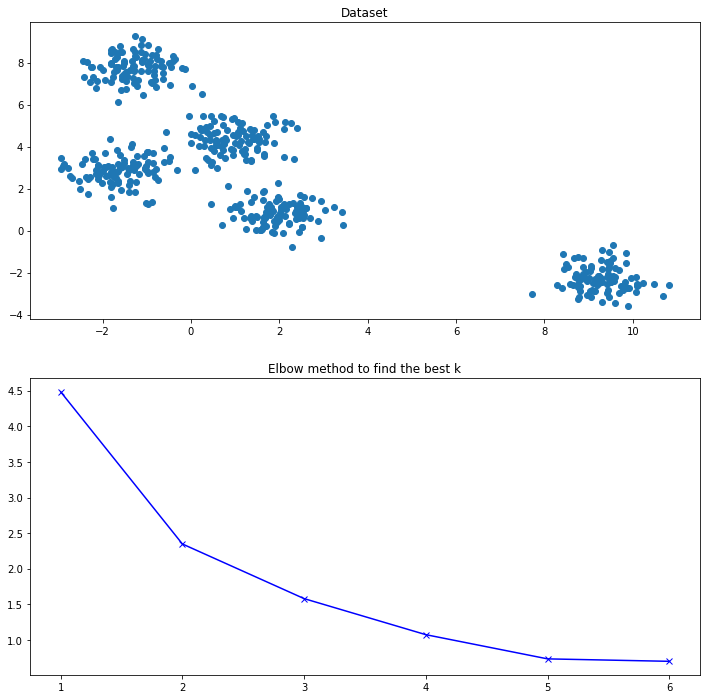

In [11]:
distortions = []
K = range(1, 7)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(
        sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis=1))
        / X.shape[0]
    )


fig, ((ax1), (ax2)) = plt.subplots(2, 1, figsize=(12,12))


ax1.set_title("Dataset")
ax1.scatter(X[:,0], X[:,1])

ax2.set_title("Elbow method to find the best k")
ax2.plot(K, distortions, 'bx-')


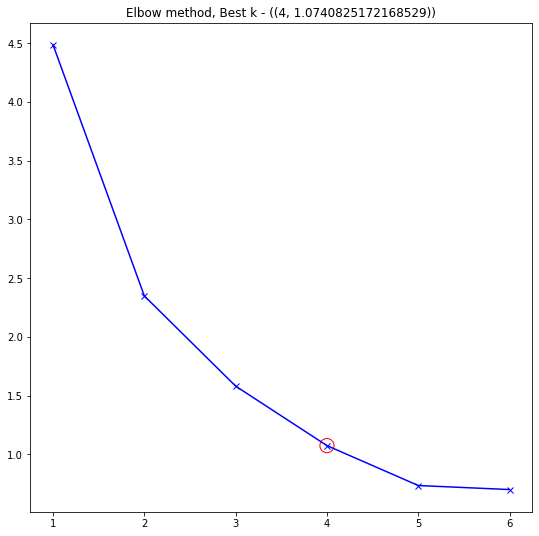

In [12]:
def plot_the_best_k(K: list[int], distortions: list[float]):
    """Plot graph of Elbow method and founded the best k

    Args:
        K (list[int]): given range for which [k] was calculated
        distortions (list[float]): calculated the average of the squared distances from the cluster centers
    """

    # define all points
    points = list(zip(K, distortions))

    # find coordinates for the best k
    x, y = min(points, key=lambda x:abs(x[1]-1))

    plt.figure(figsize=(9,9))
    plt.plot(K, distortions, "bx-")
    plt.scatter(x, y, s=200, marker="o", facecolors='none', edgecolors='r')
    plt.title(f"Elbow method, Best k - ({x, y})")
    plt.show()

plot_the_best_k(K, distortions)
    

<font color = green >

## Learn more
</font>

[sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

[Hierarchical clustering (scipy.cluster.hierarchy)](https://docs.scipy.org/doc/scipy-0.9.0/reference/cluster.hierarchy.html)

[Demo of DBSCAN clustering algorithm](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)
